### Title
description
intro

In [ ]:
#Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')


In [ ]:
#Reading the file
file = 'fcounty_clean.csv'

df = pd.read_csv(file, header=0, parse_dates=[2,8,9,10,11], infer_datetime_format=True)

In [ ]:
#Getting rid of unneccsary columns
df.drop(columns=['Incident Status','Address on Wildland','Mutual Aid Flag','Mutual Aid Flag Description','Inc Mutual Aid','HazMat Released Code','HazMat Released Code Description'], inplace=True)

In [ ]:
df.head(3)

In [ ]:
#Create new columns as differences in times
#After this point is all my work

import datetime as dt
df['Response Time'] = df['Arrival Date '] - df['Alarm Date ']
df['Response Time'] = df['Response Time']/dt.timedelta(minutes=1)

df['Controlled Time'] = df['Controlled Date'] - df['Arrival Date ']
df['Controlled Time'] = df['Controlled Time']/dt.timedelta(minutes=1)

df['Operation Duration'] = df['Last Unit Cleared Date'] - df['Arrival Date ']
df['Operation Duration'] = df['Operation Duration']/dt.timedelta(minutes=1)



In [ ]:
#Changing order of columns, CAN BE ADJUSTED
df = df[['Incident Id', 'Incident Date', 'Incident Type Code',
       'Incident Type Code Description', 'Alarm Date ', 'Arrival Date ',
       'Response Time','Controlled Date','Controlled Time', 'Last Unit Cleared Date','Operation Duration', 'Shift ', 'Alarms',
       'Apparatus Suppression', 'Apparatus EMS', 'Apparatus Other ',
       'Personnel Suppression', 'Personnel EMS', 'Personnel Other',
       'Loss Property  ', 'Loss Other', 'Loss Total', 'Value Property',
       'Value Other', 'Fire Department Fatalities', 'Fatal Other',
       'Fire Department Non Fatal', 'Non Fatal Other', 'Detector Code',
       'Dector Code Description', 'Mixed Use Code',
       'Mixed Use Code Description', 'Property Use Code',
       'Propery Use Code Description', 'Fire Department Name','Town Population', 'Incidents vs. Population',
       'Fire Department Zip', 'Incident Location Type',
       'Incident Location Type Description', 'Incident Location']]

In [ ]:
df= df(index_col= "Incident Date",parse_dates=[2,8,9,10,11])

In [ ]:
#Number of Incidents per Quarter

ax = df["Incident Id"].resample("Q").count().plot(kind="Bar")
ax.set_ylim(0, None)
ax.set_ylabel("2014")
ax.set_title("Number of Incidents")

#df["Incident Id"].resample("Q").count()

Incident Date
2014-01-31    3176
2014-02-28    2429
2014-03-31    2616
2014-04-30    2595
2014-05-31    2890
2014-06-30    2803
2014-07-31    2936
2014-08-31    2419
2014-09-30    2810
2014-10-31    2322
2014-11-30    2201
2014-12-31    2127
Freq: M, Name: Incident Id, dtype: int64

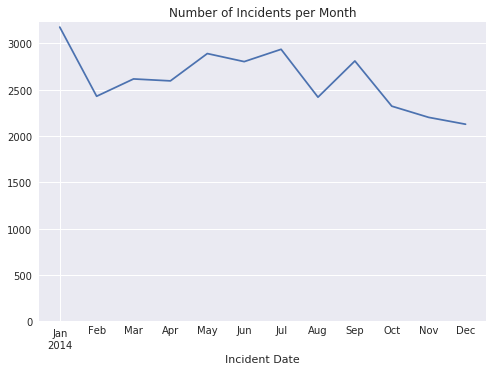

In [56]:
#Number of Incidents per Month

#months =("January","February","March","April","May","June","July","August","September","October","November","December")

ax = df["Incident Id"].resample("M").count().plot()
ax.set_ylim(0, None)
#ax.xticks(np.arange(12), ("January","February","March","April","May","June","July","August","September","October","November","December"))
ax.set_title("Number of Incidents per Month")
df["Incident Id"].resample("M").count()

Text(0.5, 1.0, 'Number of Incidents per Week')

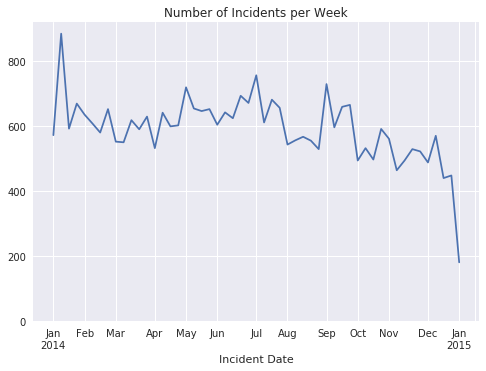

In [57]:
#number of incidents per week
ax = df["Incident Id"].resample("W").count().plot()
ax.set_ylim(0, None)
#ax.set_xticks(np.arange(12), calendar.month_name[1:13])
ax.set_title("Number of Incidents per Week")

Text(0.5, 1.0, 'Number of Fires per Day')

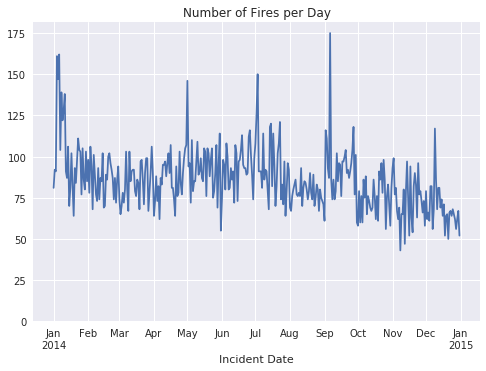

In [58]:
#Number of Incidents per Day
ax = df["Incident Id"].resample("D").count().plot()
ax.set_ylim(0, None)
ax.set_title("Number of Fires per Day")

In [59]:
#Day with the most fires
np.argmax(df["Incident Id"].resample("D").count())

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Timestamp('2014-09-06 00:00:00', freq='D')

In [60]:
#Day with the least fires
np.argmin(df["Incident Id"].resample("D").count())

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Timestamp('2014-11-08 00:00:00', freq='D')

Text(0.5, 1.0, 'Average Operating Duration time per Quarter')

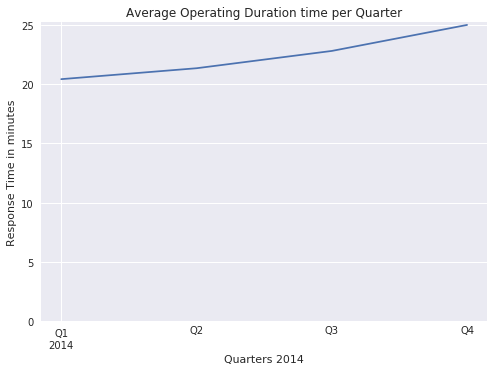

In [30]:
#Average Operating Duration per Quarter
ax1 = df["Operation Duration"].resample("Q").mean().plot()
ax1.set_ylim(0.00, None)
ax1.set_xlabel("Quarters 2014")
ax1.set_ylabel("Response Time in minutes")
ax1.set_title("Average Operating Duration time per Quarter")
df["Operation Duration"].resample("Q").mean()

Incident Date
2014-01-31    22.103437
2014-02-28    19.824946
2014-03-31    18.856689
2014-04-30    21.121408
2014-05-31    20.780497
2014-06-30    22.046251
2014-07-31    27.332856
2014-08-31    19.937418
2014-09-30    20.454714
2014-10-31    20.185286
2014-11-30    21.149497
2014-12-31    34.122772
Freq: M, Name: Operation Duration, dtype: float64

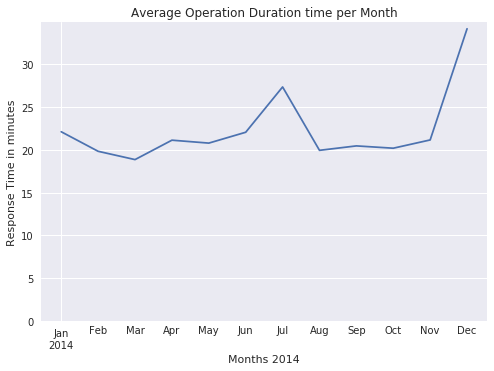

In [31]:
#Average Operating Duration per Month
ax2 = df["Operation Duration"].resample("M").mean().plot()
ax2.set_ylim(0.00, None)
ax2.set_xlabel("Months 2014")
ax2.set_ylabel("Response Time in minutes")
ax2.set_title("Average Operation Duration time per Month")
df["Operation Duration"].resample("M").mean()

In [17]:
#which month had the highest mean Operation Duration
np.argmax(df["Operation Duration"].resample("M").mean())

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Timestamp('2014-12-31 00:00:00', freq='M')

In [18]:
#which month had the lowest mean Operation Duration
np.argmin(df["Operation Duration"].resample("M").mean())

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Timestamp('2014-03-31 00:00:00', freq='M')

Text(0.5, 1.0, 'Average Operation Duration time per Week')

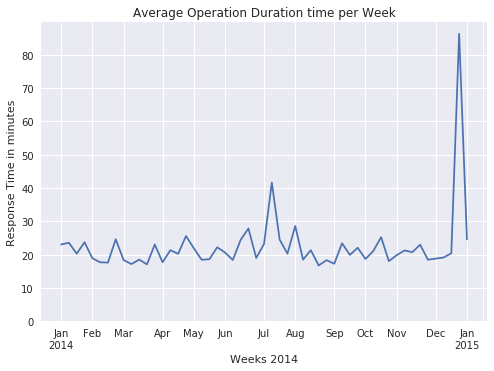

In [19]:
#Average operation duration per week
ax3 = df["Operation Duration"].resample("W").mean().plot()
ax3.set_ylim(0.00, None)
ax3.set_xlabel("Weeks 2014")
ax3.set_ylabel("Response Time in minutes")
ax3.set_title("Average Operation Duration time per Week")

Text(0.5, 1.0, 'Average Operation Duration time per Day')

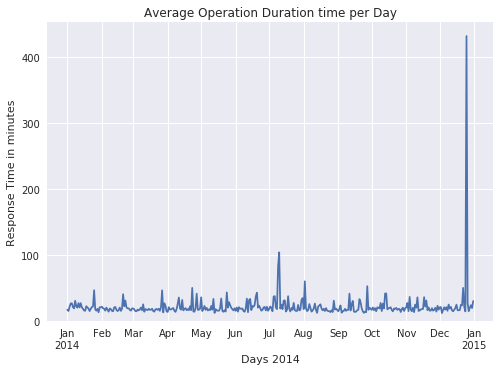

In [20]:
#Average operation duration per day
ax4 = df["Operation Duration"].resample("D").mean().plot()
ax4.set_ylim(0.00, None)
ax4.set_xlabel("Days 2014")
ax4.set_ylabel("Response Time in minutes")
ax4.set_title("Average Operation Duration time per Day")

Text(0.5, 1.0, 'Average Operation Duration rolling 30 day average')

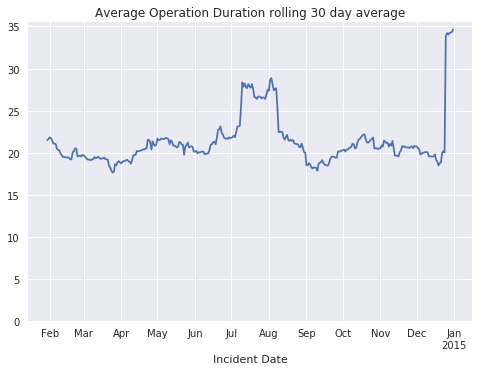

In [21]:
#Average operation duration per day rolling 30 day average
ax2 = df["Operation Duration"].resample("D").mean().rolling(30).mean().plot()
ax2.set_ylim(0, None)
ax2.set_title("Average Operation Duration rolling 30 day average")

In [22]:
#which day had the highest average operaton duration
np.argmax(df["Operation Duration"].resample("D").mean())

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Timestamp('2014-12-25 00:00:00', freq='D')

In [23]:
#which day had the highest  operaton duration
np.argmax(df["Operation Duration"])

Timestamp('2014-12-25 00:00:00')

In [24]:
np.argmin(df["Operation Duration"].resample("D").mean())

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Timestamp('2014-12-03 00:00:00', freq='D')

In [27]:
#Correlation between number of incidents and response time
(df["Incident Id"].resample("D").count()).corr(df["Response Time"].resample("D").mean())

0.052199113062042495

In [28]:
#Correlation between number of incidents and repsonse time
(df["Incident Id"].resample("D").count()).corr(df["Operation Duration"].resample("D").mean())

0.001395831352146435

In [ ]:
#Find the most frequent incident types
df['Incident Type Code'].value_counts()

In [ ]:
#Created data frame for the five most frequent call types and plotted the results
data = pd.DataFrame([(321,'EMS Call',11059), (743, 'Smoke Detector Activation', 1925),(745,'Dispatched and Cancelled en Route',1353),(611,'Motor Vehicle Accident with Injuries',1316),(322,'Alarm System Activation due To Malfunction',1296)], columns=['Incident Code', 'Type', 'Total Amount'])
indexed_data = data.set_index('Incident Code')
print(indexed_data)
indexed_data.plot(x='Type', y='Total Amount', kind='bar') 

In [ ]:
#Created data frame for incident types that had the greatest total loss
df1 = df.groupby('Incident Type Code')['Loss Total'].sum()/df['Loss Total'].sum()*100
df1.sort_values(ascending=False)

In [ ]:
#Pie chart of incident type total loss 
total_percent = [76.67,10.68,7.48,2.39,1.13]
incident_type = ['Building Fire','Arcing, Shorted Electrical Equipment','Passenger Vehicle Fire','Water Vehicle Fire','Road Freight Vehicle Fire']
explode = (0.1,0.0,0.0,0.0,0.0)
plt.pie(total_percent,autopct='%.1f%%', startangle=90, explode=explode, shadow=True)  
plt.title('Percentage of Overall Total Cost of Damage for Top 5 Incidents')
plt.legend(incident_type, loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
#Added two columns, Town Population and Incidents vs. Population
incidents = {'FAIRFIELD FIRE DEPT.':8466,'GREENWICH FIRE DEPARTMENT':3387,'NORWALK FIRE DEPT.':4963,'STAMFORD FIRE DEPT.':10011,'WESTPORT FIRE DEPARTMENT':3252,'TOWN OF DARIEN':529, 'NOROTON HEIGHTS FIRE DEPT.': 413, 'NOROTON FIRE DEPT.':286, 'ROWAYTON FIRE DEPT.':17}
Number_of_Incidents = df['Fire Department Name'].map(incidents)
variable = {'FAIRFIELD FIRE DEPT.':62105,'GREENWICH FIRE DEPARTMENT': 62855,'NORWALK FIRE DEPT.': 89005,'STAMFORD FIRE DEPT.':130824,'WESTPORT FIRE DEPARTMENT':28024,'TOWN OF DARIEN':21887,'NOROTON FIRE DEPT.':21887,'ROWAYTON FIRE DEPT.':89005,'NOROTON HEIGHTS FIRE DEPT.':21887}
df['Town Population'] = df['Fire Department Name'].map(variable)
df['Incidents vs. Population'] = Number_of_Incidents/df['Town Population']

In [ ]:
#Scatter plot of incidents and population
plt.scatter(df['Town Population'],Number_of_Incidents)
plt.ylabel('Number of Incidents')
plt.xlabel('Town Population')
plt.title('Incidents vs. Population')

In [ ]:
#Graph of incidents vs. population
inc = df['Incidents vs. Population'].drop_duplicates()
fd_name = ['Fairfield', 'Greenwich', 'Norwalk', 'Stamford', 'Westport', 'Darien', 'Noroton Heights', 'Noroton', 'Rowayton']
plt.bar(fd_name,inc)
plt.tight_layout()
plt.xticks(rotation=45, fontsize='10', horizontalalignment='right')
plt.xlabel('Towns')
plt.ylabel('Incidents vs. Population')

In [ ]:
#Mean plot of response times per town

mean_response_time = sns.pointplot(x="Response Time", y="Fire Department Name", data=df, capsize=.1,Title='Response Times per Town')

plt.show

In [ ]:
#Mean plot of controlled times per town
mean_control_times = sns.pointplot(x="Controlled Time", y="Fire Department Name", data=df, color ='g',capsize=.1,title='Controlled Time')

plt.show()

In [ ]:
#Mean plot of operation duration times per town
mean_operation_times = sns.pointplot(x="Operation Duration", y="Fire Department Name", color = 'orange',data=df, capsize=.1)

plt.show()

In [ ]:
#Look at how long fairfield firefighters put out fires
#Need to make a dataframe of just Fairfield Incidents. 

ffield = df.loc[df['Fire Department Name']=='FAIRFIELD FIRE DEPT.']

#Dataframe of Faifield fire incidents at homes or buildings, using 'Incident Type Code' 111:116
ffield_fire = ffield.loc[ffield['Incident Type Code'].isin([111,112,113,114,115,116])]


ffield_fire.head(3)

In [ ]:
#Let's look at  types of fires that the FAIRFIELD FIRE DEPT. responded to 

sns.countplot(y='Incident Type Code', data=ffield_fire)
plt.show()

In [ ]:
#Let's look at each specific fire type and see how long it took from arrival to last unit cleared date

sns.stripplot(x='Incident Type Code', y='Operation Duration', data = ffield_fire, jitter =True)

plt.show()

In [ ]:
#Woah, there are some big outliers, especially in fire code 111. Let's look at those values a little further.
#We'll set the index to incident date to see on what days those happened to research a little more into those incidents.

ffield_fire.set_index('Incident Date', inplace=True)

In [ ]:
#Let's return a datframe of the outliers

outliers = ffield_fire[ffield_fire['Operation Duration'] > 400]
outliers.head(3)

In [ ]:
ffield_fire_no_outliers = ffield_fire[ffield_fire['Operation Duration'] < 250]
fig, ax = plt.subplots()

sns.swarmplot(x='Incident Type Code', y='Operation Duration', data = ffield_fire_no_outliers, ax=ax)
ax.set(ylim = (0,220))

plt.show()